# MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist     # MNIST is a large database which consist over 60000 images of handwritten digits

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()   # Loading the data in the 2 variable

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]    # '0' th position of the array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train[0].shape     # it is a 28x28 pixel image

(28, 28)

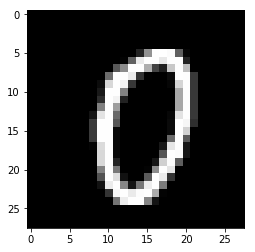

In [6]:
plt.imshow(X_train[1000],cmap='gray', interpolation ='none')   # you select any no. from 0 to 59999 as there are 60000 images.
plt.show()

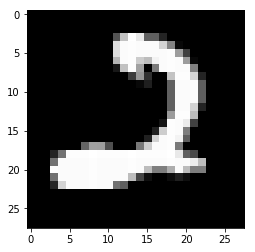

In [7]:
plt.imshow(X_train[1010],cmap='gray', interpolation ='none')
plt.show()

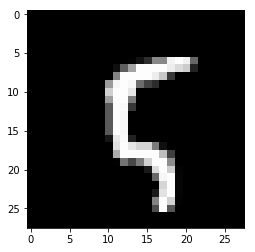

In [8]:
plt.imshow(X_train[100],cmap='gray', interpolation ='none')
plt.show()

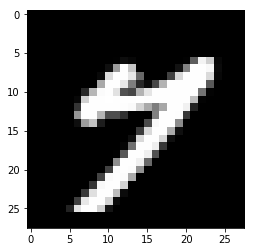

In [9]:
plt.imshow(X_train[1001],cmap='gray', interpolation ='none')
plt.show()

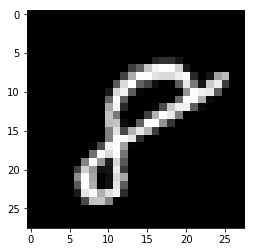

In [10]:
plt.imshow(X_train[59999],cmap='gray', interpolation ='none')
plt.show()

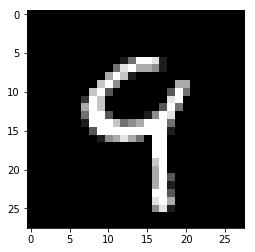

In [11]:
plt.imshow(X_train[344],cmap='gray', interpolation ='none')
plt.show()

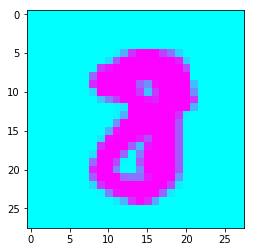

In [12]:
plt.imshow(X_train[2598],cmap='cool', interpolation ='none')
plt.show()

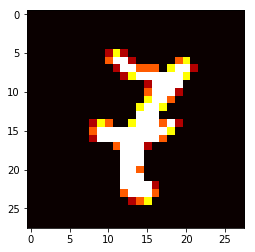

In [13]:
plt.imshow(X_train[3494],cmap='hot', interpolation ='none')
plt.show()

In [14]:
import vis

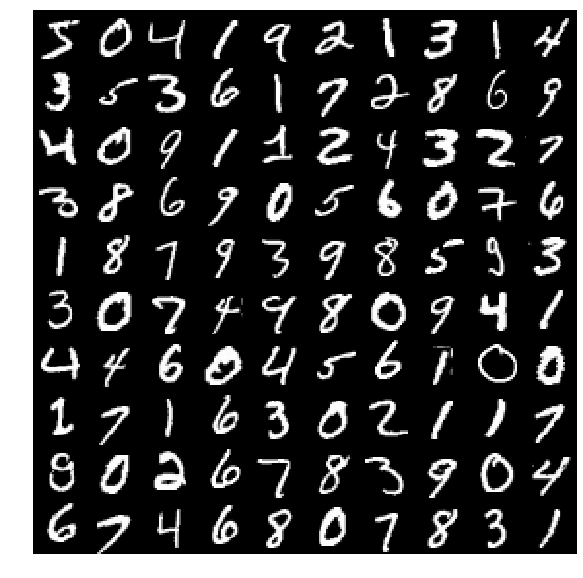

In [15]:
vis.imshow_sprite(X_train[:100])    # first 100 images

In [16]:
28*28

784

In [17]:
print('X_train shape', X_train.shape)     # 60000 samples
print('X_test shape', X_test.shape)       # 10000 test samples
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


# Build input vector from 28x28 pixel

In [18]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize

In [19]:
X_train/=255
X_test/=255

# Print shape of final data

In [20]:
print ('train matrix shape', X_train.shape)
print ('test matrix shape', X_test.shape)

train matrix shape (60000, 784)
test matrix shape (10000, 784)


In [21]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [22]:
from keras.utils import np_utils

# one-hot encoding

In [23]:
n_classes=10

In [24]:
y_orig= y_test
print('Shape before one-hot coding', y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print('Shape after one-hot coding', y_train.shape)

Shape before one-hot coding (60000,)
Shape after one-hot coding (60000, 10)


In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Keras Neural Network

In [26]:
from keras.models import Sequential    # Keras has all neural networks
from keras.layers.core import Dense,Activation

In [27]:
model =  Sequential()
model.add(Dense(512,input_shape=(784,)))    # input is 28x28=784
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
model.summary()    # Param is 401920... for o/p: (401920x60000xno. of epochs) is the calculation done

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [29]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

# Train

In [30]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 5, validation_data= [X_test, y_test])
#  epoch run 60000 samples each time

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.1809 - acc: 0.9446 - val_loss: 0.0932 - val_acc: 0.9711
Epoch 2/5
60000/60000 [==============================] - 25s 424us/step - loss: 0.0800 - acc: 0.9751 - val_loss: 0.0886 - val_acc: 0.9741
Epoch 3/5
60000/60000 [==============================] - 22s 367us/step - loss: 0.0547 - acc: 0.9828 - val_loss: 0.1134 - val_acc: 0.9673
Epoch 4/5
60000/60000 [==============================] - 22s 373us/step - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0778 - val_acc: 0.9793
Epoch 5/5
60000/60000 [==============================] - 25s 425us/step - loss: 0.0326 - acc: 0.9897 - val_loss: 0.0927 - val_acc: 0.9765


# Lets Predict

In [31]:
# we haven't used 10000 test samples. Here's it's prediction

In [32]:
y_pred = model.predict_classes(X_test)

In [33]:
y_pred.shape

(10000,)

In [34]:
X_temp = X_test[0].reshape(28,28)    # sample[0] is tested amongst 10000 samples

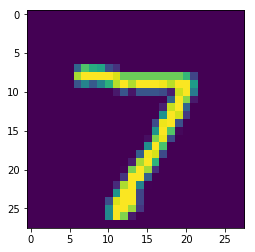

In [35]:
plt.imshow(X_temp)
plt.show()

In [36]:
 y_pred[0]   # the o/p given by ANN is '7' which is correct 

7

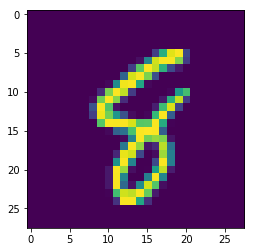

In [37]:
X_temp = X_test[9875].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [38]:
y_pred[9875]

8

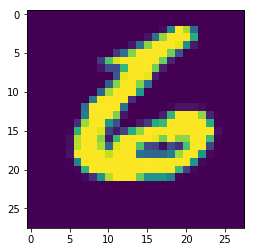

In [39]:
X_temp = X_test[9999].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [40]:
y_pred[9999]

6

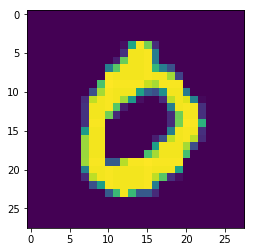

In [41]:
X_temp = X_test[3].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [42]:
y_pred[3]

0

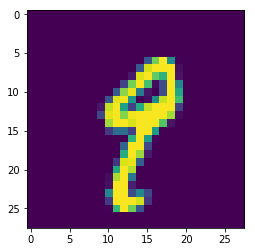

In [43]:
X_temp = X_test[78].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [44]:
y_pred[78]

9

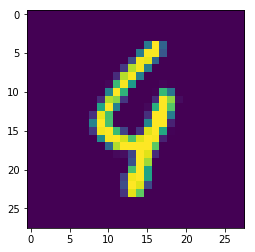

In [45]:
X_temp = X_test[115].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [46]:
y_pred[115]

4

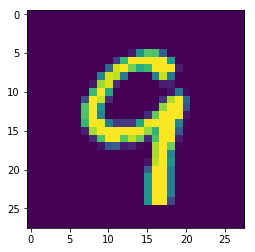

In [47]:
X_temp = X_test[150].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [48]:
y_pred[150]

9

In [55]:
i_i = np.nonzero(y_pred != y_orig)[0]   # we wrote nonzero meaning the multidimension array doesn't show zero arrays 
                                        # we wrote[0]at the end to show single dimension as numpy works on multidimension, 
                                        # this way, other dimension arrays aren't displayed, whose values are anyway [0]

In [56]:
len(i_i)

235

In [57]:
i_i #  these are the error positions that have occured

array([ 151,  217,  247,  264,  381,  448,  578,  582,  610,  615,  619,
        684,  716,  720,  810,  844,  882,  947,  951,  965, 1014, 1039,
       1112, 1114, 1166, 1181, 1226, 1232, 1242, 1247, 1299, 1319, 1326,
       1328, 1364, 1393, 1403, 1425, 1458, 1522, 1530, 1549, 1553, 1621,
       1681, 1709, 1754, 1838, 1868, 1878, 1900, 1901, 1909, 1941, 1952,
       1982, 1987, 1993, 2016, 2018, 2024, 2040, 2070, 2098, 2109, 2118,
       2135, 2182, 2293, 2369, 2387, 2406, 2414, 2582, 2597, 2648, 2654,
       2720, 2742, 2753, 2760, 2810, 2863, 2877, 2896, 2921, 2927, 2939,
       2946, 2952, 2953, 2961, 2970, 3030, 3073, 3117, 3289, 3475, 3503,
       3520, 3549, 3558, 3597, 3662, 3767, 3780, 3808, 3853, 3906, 3926,
       3941, 3943, 3985, 4000, 4065, 4075, 4078, 4140, 4163, 4176, 4199,
       4201, 4289, 4360, 4369, 4405, 4425, 4437, 4443, 4460, 4477, 4497,
       4507, 4536, 4635, 4690, 4740, 4751, 4761, 4785, 4807, 4823, 4838,
       4879, 4951, 4956, 5067, 5078, 5140, 5246, 53

In [58]:
i_i.shape

(235,)

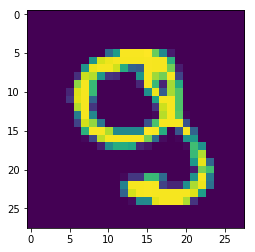

In [59]:
X_temp = X_test[151].reshape(28,28)
plt.imshow(X_temp)
plt.show()

In [61]:
y_pred[151]

8

In [ ]:
s